In [16]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
Reviewdata = pd.read_csv('C:/Users/admin/Downloads/archive (13)/train.csv')

In [18]:
Reviewdata

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy


In [19]:
Reviewdata.shape

(38932, 5)

In [20]:
Reviewdata.info

<bound method DataFrame.info of        User_ID                                        Description  \
0      id10326  The room was kind of clean but had a VERY stro...   
1      id10327  I stayed at the Crown Plaza April -- - April -...   
2      id10328  I booked this hotel through Hotwire at the low...   
3      id10329  Stayed here with husband and sons on the way t...   
4      id10330  My girlfriends and I stayed here to celebrate ...   
...        ...                                                ...   
38927  id49253  We arrived late at night and walked in to a ch...   
38928  id49254  The only positive impression is location and p...   
38929  id49255  Traveling with friends for shopping and a show...   
38930  id49256  The experience was just ok. We paid extra for ...   
38931  id49257  The Westin is a wonderfully restored grande da...   

            Browser_Used Device_Used Is_Response  
0                   Edge      Mobile   not happy  
1      Internet Explorer      Mobile 

In [22]:
Reviewdata.describe()


,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38932,11,3,2
top,id25911,"If you're going to New York for walking, eatin...",Firefox,Desktop,happy
freq,1,1,7367,15026,26521


In [24]:
Reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id25911,1
Description,38932,38932,"If you're going to New York for walking, eatin...",1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [26]:
#Checking missing values in the dataset and printing the percentage for missing values of each columns

count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count,percentage],axis=1,
keys = ['Count','Percentage'])
print('Count and percentage of missing values for the columns')
missing_data

Count and percentage of missing values for the columns


,Count,Percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


Percentage for default
happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


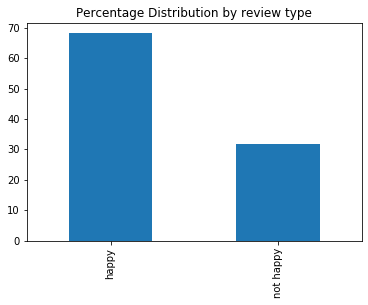

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default')
print(round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2))
round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2).plot(kind ='bar')
plt.title('Percentage Distribution by review type')
plt.show()

In [32]:
Reviewdata.drop(columns = ['User_ID','Browser_Used','Device_Used'],inplace = True)

In [40]:
#First level cleaning
import re
import string

#converts into lower-case ,remove square bracket , remove numbers and punctuation

def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text) # remove bigger bracket
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)# remove punctuation
    text = re.sub('\w*\d\w*','',text)# remove digits
    return text

cleaned1 = lambda x:text_clean_1(x)
    

In [41]:
Reviewdata['cleaned_description']= pd.DataFrame(Reviewdata.Description.apply(cleaned1))
Reviewdata

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
...,...,...,...
38927,We arrived late at night and walked in to a ch...,happy,we arrived late at night and walked in to a ch...
38928,The only positive impression is location and p...,not happy,the only positive impression is location and p...
38929,Traveling with friends for shopping and a show...,not happy,traveling with friends for shopping and a show...
38930,The experience was just ok. We paid extra for ...,not happy,the experience was just ok we paid extra for a...


In [42]:
#apply second level of cleaning 
def text_clean_2(text):
    text = re.sub('[''""_]','',text)
    text = re.sub('\n','',text)
    return text
cleaned2 = lambda x:text_clean_2(x)

In [43]:
Reviewdata['cleaned_description_new'] = pd.DataFrame(Reviewdata['cleaned_description'].apply(cleaned2))
Reviewdata.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


In [47]:
from sklearn.model_selection import train_test_split
independent_var = Reviewdata.cleaned_description_new
dependent_var = Reviewdata.Is_Response
IV_train,IV_test,DV_train,DV_test = train_test_split(independent_var,dependent_var,test_size =0.1,random_state = 225)

print('IV_train :',len(IV_train))
print('IV_test :',len(IV_test))
print('DV_train :',len(DV_train))
print('DV_test :',len(DV_test))

IV_train : 35038
IV_test : 3894
DV_train : 35038
DV_test : 3894


In [54]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = 'lbfgs')

from sklearn.pipeline import Pipeline

In [56]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit( IV_train , DV_train )

from sklearn.metrics import confusion_matrix
predictions = model.predict(IV_test)
confusion_matrix(predictions , DV_test)

array([[2417,  304],
       [ 154, 1019]], dtype=int64)

In [57]:
#model prediction

from sklearn.metrics import accuracy_score ,precision_score,recall_score

print('Accuracy :',accuracy_score(predictions,DV_test))
print('Precision :',precision_score(predictions ,DV_test , average = 'weighted'))
print('Recall :',recall_score(predictions , DV_test , average = 'weighted'))

Accuracy : 0.8823831535695943
Precision : 0.8889271415963718
Recall : 0.8823831535695943


In [68]:
example = ['it was good']
result = model.predict(example)
print(result)

['happy']
